In [ ]:
#Name: Rajas Chodankar
#Task Name: Single Phase PLL using Harmonic Oscillator

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [38]:
f=50
w=2*math.pi*f
Ts=1e-6
t=[0.0]
x_input=[0.0]
y_input=[1.0]
h=Ts*w
W=[w]
x_output=[0.0]
y_output=[1.0]
h_output=Ts*W[0]
alpha_output = ((1-(h_output*h_output/4))/(1+(h_output*h_output/4)))
beta_output = (h_output/(1+(h_output*h_output/4)))
alpha=((1-(h*h/4))/(1+(h*h/4)))
beta=(h/(1+(h*h/4)))

In [39]:
R=10
C=1000e-6
Toe=R*C
LP=[0.0]
extra=[0.0]
klp=Ts/Toe
out_sign=[0.0]
zcd_1 = [1]
zcd_2 = [1]

In [40]:
def XOR (a, b): 
    if a != b: 
        return 1
    else: 
        return 0

In [41]:
def BIN (a): 
    if a>0.0: 
        return 1
    else: 
        return 0

In [42]:
def ZCD(signal):
    if signal>0.0:
        return 1
    else:
        return 0

In [43]:
for n in range(0,500000):
    t.append(Ts + t[n])
    x_input.append(alpha*x_input[n] + beta*y_input[n])
    y_input.append(alpha*y_input[n] - beta*x_input[n])
    
    #Harmonic Oscillator
    x_output.append(alpha_output*x_output[n] + beta_output*y_output[n])
    y_output.append((alpha_output*y_output[n] - beta_output*x_output[n]))
    #output_signal.append(y_output[n+1])
    
    #determining zcd_1 state
    zcd_1.append((y_input[n+1])>0)
    #determining zcd_2 state
    zcd_2.append((x_output[n+1])>0)
    
    extra.append(((zcd_1[n+1])^(zcd_2[n+1])))
    LP.append(LP[n]+klp*(((zcd_1[n+1])^(zcd_2[n+1]))-LP[n]))
    W.append(650*LP[n+1])
    h_output = (Ts*W[n+1])
    alpha_output = ((1-(h_output*h_output/4))/(1+(h_output*h_output/4)))
    beta_output = (h_output/(1+(h_output*h_output/4)))

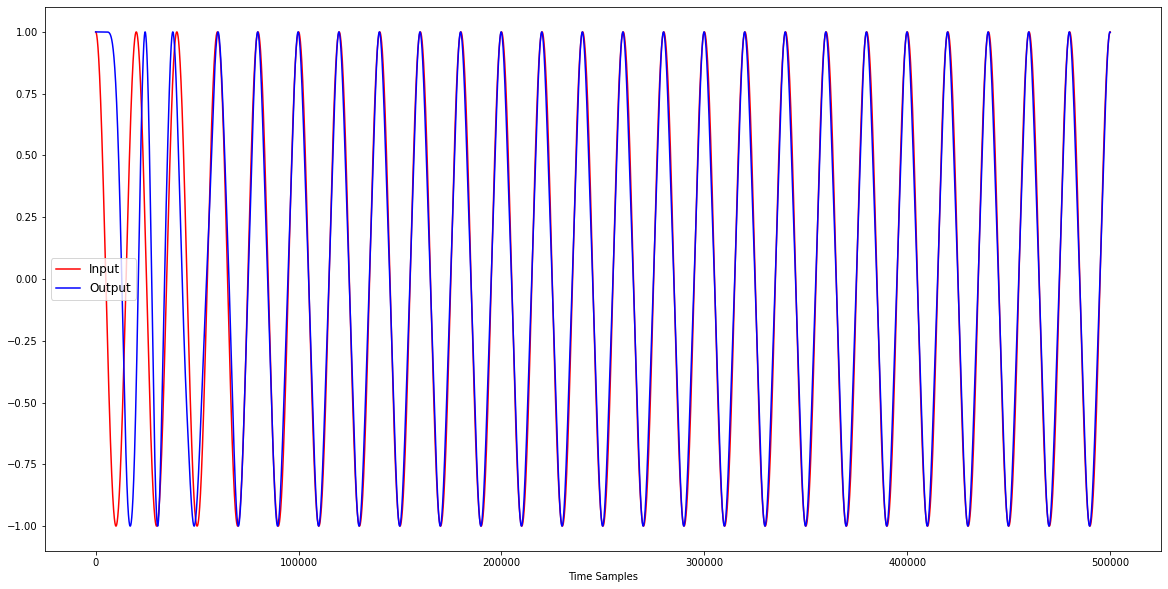

In [46]:
plt.figure(figsize=(20,10))
plt.plot(y_input, 'r',label='Input')
plt.plot(y_output, 'b',label='Output')
plt.xlabel('Time Samples')
plt.legend(fontsize='large')
plt.show(block=True)